In [1]:
import pandas as pd
from tqdm import tqdm
from matplotlib import pyplot as plt
import numpy as np

In [5]:
#PATH_FILE_SCORE = './scoreFiltratiCsv.csv'
PATH_FILE_SCORE = './scoreCsv.csv'

scores = pd.read_csv(PATH_FILE_SCORE)

In [6]:
def calcola_id_soggetto_da_utente(u):
    return f'{u.split("_")[0]}{u.split("_")[1]}'

def calcola_num_acquisizione_da_utente(u):
    return u.split('_')[-1]

In [4]:
scores['Primo soggetto'] = scores['Utente1'].apply(lambda u: calcola_id_soggetto_da_utente(u))
scores['Secondo soggetto'] = scores['Utente2'].apply(lambda u: calcola_id_soggetto_da_utente(u))

In [5]:
scores.head(10)

,Utente1,Utente2,ScoreML,Primo soggetto,Secondo soggetto
0,1_M_1,1_M_10,0.595889,1M,1M
1,1_M_1,1_M_11,0.567831,1M,1M
2,1_M_1,1_M_12,0.550778,1M,1M
3,1_M_1,1_M_13,0.497624,1M,1M
4,1_M_1,1_M_14,0.539765,1M,1M
5,1_M_1,1_M_15,0.570848,1M,1M
6,1_M_1,1_M_2,0.559740,1M,1M
7,1_M_1,1_M_3,0.562043,1M,1M
8,1_M_1,1_M_4,0.590155,1M,1M
9,1_M_1,1_M_5,0.554073,1M,1M


### Calcolo FAR

In [6]:
threshold_far = []
threshold_frr = []
for threshold in tqdm(range(1, 101)):
    cont_far = 0
    cont_frr = 0
    for i, row in scores.iterrows():
        primo_soggetto = row['Primo soggetto']
        secondo_soggetto = row['Secondo soggetto']
        scoreMl = row['ScoreML'] * 100
        if(primo_soggetto != secondo_soggetto and scoreMl > threshold):
            cont_far += 1
        if(primo_soggetto == secondo_soggetto and scoreMl < threshold):
            cont_frr += 1
    threshold_far.append(cont_far)
    threshold_frr.append(cont_frr)

100%|██████████| 100/100 [00:30<00:00,  3.27it/s]


In [7]:
max_far = len(scores[scores['Primo soggetto'] != scores['Secondo soggetto']])
max_frr = len(scores[scores['Primo soggetto'] == scores['Secondo soggetto']])

In [8]:
threshold_far_norm = [i / max_far for i in threshold_far]
threshold_frr_norm = [i / max_frr for i in threshold_frr]

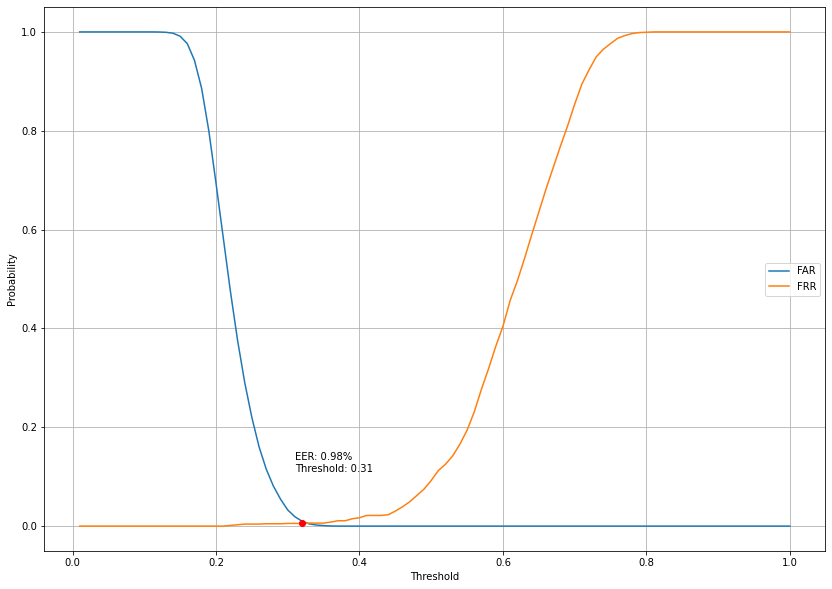

In [9]:
y_values = [i/100 for i in range(1, 101)]

plt.figure(figsize=(14,10))
plt.plot(y_values, threshold_far_norm, label='FAR')
plt.plot(y_values, threshold_frr_norm, label='FRR')
plt.grid()
plt.xlabel("Threshold")
plt.ylabel("Probability")
plt.legend()


idx = np.argwhere(np.diff(np.sign(np.array(threshold_far_norm) - np.array(threshold_frr_norm)))).flatten()
plt.plot(np.array(y_values)[idx], np.array(threshold_frr_norm)[idx], 'ro')

index_eer = int(idx)
EER_perc = round((threshold_far_norm[index_eer] * 100)* 100)/ 100

plt.text(index_eer/100, EER_perc/100 + 0.1, f'EER: {EER_perc}%\nThreshold: {index_eer/100}')

plt.show()